In [ ]:
This is my first attempt on this database, some parts of the kernel is based on Linus W. kernel, mostly how to access de data. It implements a very easy DNN achieving 96% of accuracy in the test set.
I hope that this can be helpful as a starting point for anyone in the future. I will try to improve it in future revisions.

In [1]:
# Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os


In [2]:
# Reading the input images and putting them into a numpy array
data=[]
labels=[]

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width*channels

for i in range(classes) :
    path = "./Train/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
Cells=np.array(data)
labels=np.array(labels)

#Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

./Train/0/
./Train/1/
./Train/2/
./Train/3/
./Train/4/
./Train/5/
./Train/6/
./Train/7/
./Train/8/
./Train/9/
./Train/10/
./Train/11/
./Train/12/
./Train/13/
./Train/14/
./Train/15/
./Train/16/
./Train/17/
./Train/18/
./Train/19/
./Train/20/
./Train/21/
./Train/22/
./Train/23/
./Train/24/
./Train/25/
./Train/26/
./Train/27/
./Train/28/
./Train/29/
./Train/30/
./Train/31/
./Train/32/
./Train/33/
./Train/34/
./Train/35/
./Train/36/
./Train/37/
./Train/38/
./Train/39/
./Train/40/
./Train/41/
./Train/42/


In [3]:
#Spliting the images into train and validation sets
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#Using one hote encoding for the train and validation labels
from keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

Using TensorFlow backend.


In [4]:
#Definition of the DNN model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

Train on 31368 samples, validate on 7841 samples
Epoch 1/10
31368/31368 [==============================] - 130s 4ms/step - loss: 1.3588 - accuracy: 0.6119 - val_loss: 0.2102 - val_accuracy: 0.9371
Epoch 2/10
31368/31368 [==============================] - 115s 4ms/step - loss: 0.3074 - accuracy: 0.9056 - val_loss: 0.1123 - val_accuracy: 0.9684
Epoch 3/10
31368/31368 [==============================] - 114s 4ms/step - loss: 0.1985 - accuracy: 0.9384 - val_loss: 0.0869 - val_accuracy: 0.9732
Epoch 4/10
31368/31368 [==============================] - 114s 4ms/step - loss: 0.1557 - accuracy: 0.9522 - val_loss: 0.0760 - val_accuracy: 0.9776
Epoch 5/10
31368/31368 [==============================] - 114s 4ms/step - loss: 0.1259 - accuracy: 0.9630 - val_loss: 0.0471 - val_accuracy: 0.9855
Epoch 6/10
31368/31368 [==============================] - 115s 4ms/step - loss: 0.1058 - accuracy: 0.9655 - val_loss: 0.0377 - val_accuracy: 0.9894
Epoch 7/10
31368/31368 [==============================] - 115s 

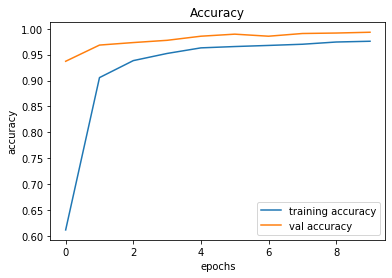

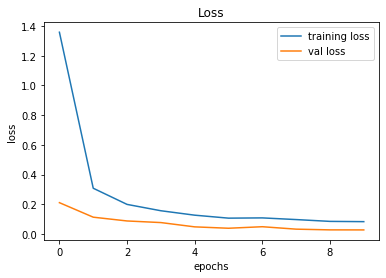

In [5]:
#using ten epochs for the training and saving the accuracy for each epoch
epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_val, y_val))

#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [6]:
#Predicting with the test data
y_test=pd.read_csv("./gtsrb-german-traffic-sign/Test.csv")
labels=y_test['Path'].as_matrix()
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('./gtsrb-german-traffic-sign/Test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255 
pred = model.predict_classes(X_test)

/home/wade/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9681710213776722

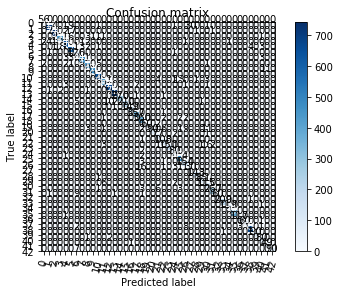

In [8]:
# Confussion matrix 
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=75) 
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = range(43)
cm = confusion_matrix(pred,y_test)

plt.figure(2)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

In [9]:
model.save('final_training_model.h5')